Processing test: 100%|██████████| 6/6 [00:00<00:00, 16.42it/s]


   split    city                                       file     label  \
0  train  aachen  aachen_000000_000019_gtFine_polygons.json      road   
1  train  aachen  aachen_000000_000019_gtFine_polygons.json  sidewalk   
2  train  aachen  aachen_000000_000019_gtFine_polygons.json       car   
3  train  aachen  aachen_000000_000019_gtFine_polygons.json       car   
4  train  aachen  aachen_000000_000019_gtFine_polygons.json       car   

                                             polygon  
0  [[0, 769], [290, 574], [93, 528], [0, 524], [0...  
1  [[2047, 532], [1911, 537], [1828, 540], [1782,...  
2  [[806, 503], [803, 524], [796, 528], [785, 528...  
3  [[281, 430], [196, 429], [181, 436], [172, 444...  
4  [[281, 430], [196, 429], [181, 436], [172, 444...  
label
pole                    52748
static                  47217
car                     31822
traffic sign            24976
person                  21413
vegetation              17745
traffic light           11898
sidewalk       

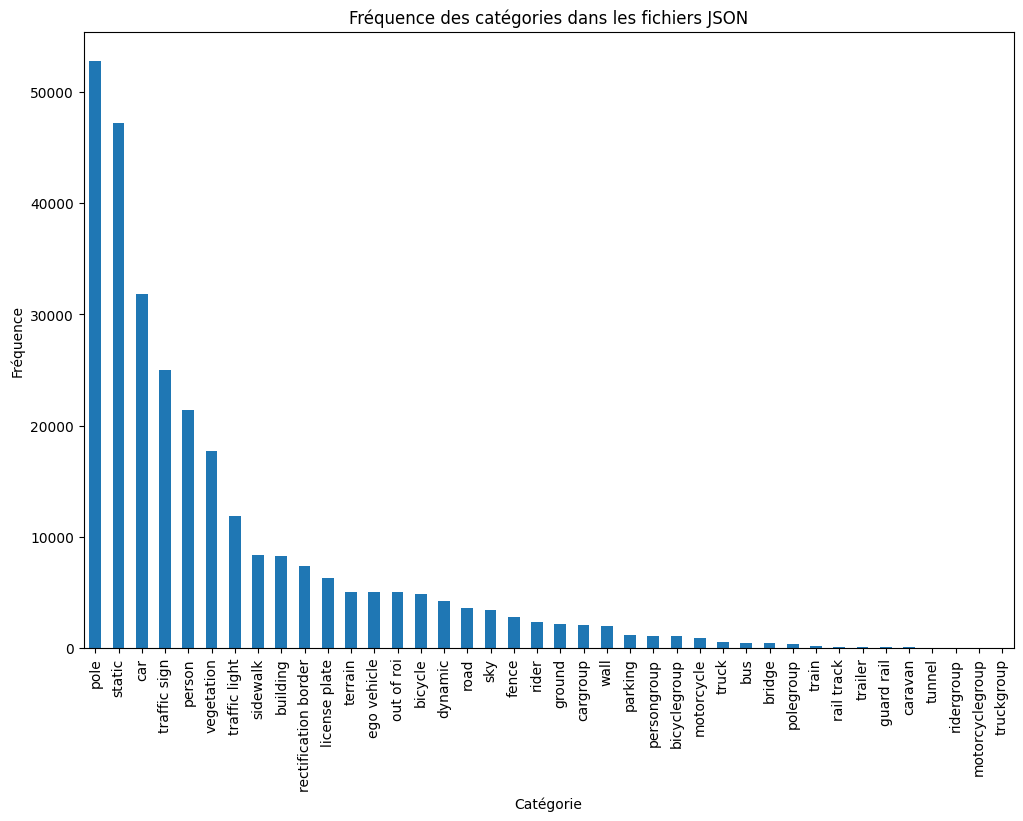

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Définir les chemins
gtfine_dir = './gtfine'

# Extraire les données des fichiers JSON
data = []

for split in ['train', 'val', 'test']:
    split_dir = os.path.join(gtfine_dir, split)
    for city in tqdm(os.listdir(split_dir), desc=f'Processing {split}'):
        city_dir = os.path.join(split_dir, city)
        for file in os.listdir(city_dir):
            if file.endswith('_gtFine_polygons.json'):
                json_path = os.path.join(city_dir, file)
                with open(json_path, 'r') as f:
                    json_data = json.load(f)
                    for obj in json_data['objects']:
                        data.append({
                            'split': split,
                            'city': city,
                            'file': file,
                            'label': obj['label'],
                            'polygon': obj['polygon']
                        })

# Créer un DataFrame à partir des données extraites
df = pd.DataFrame(data)
print(df.head())

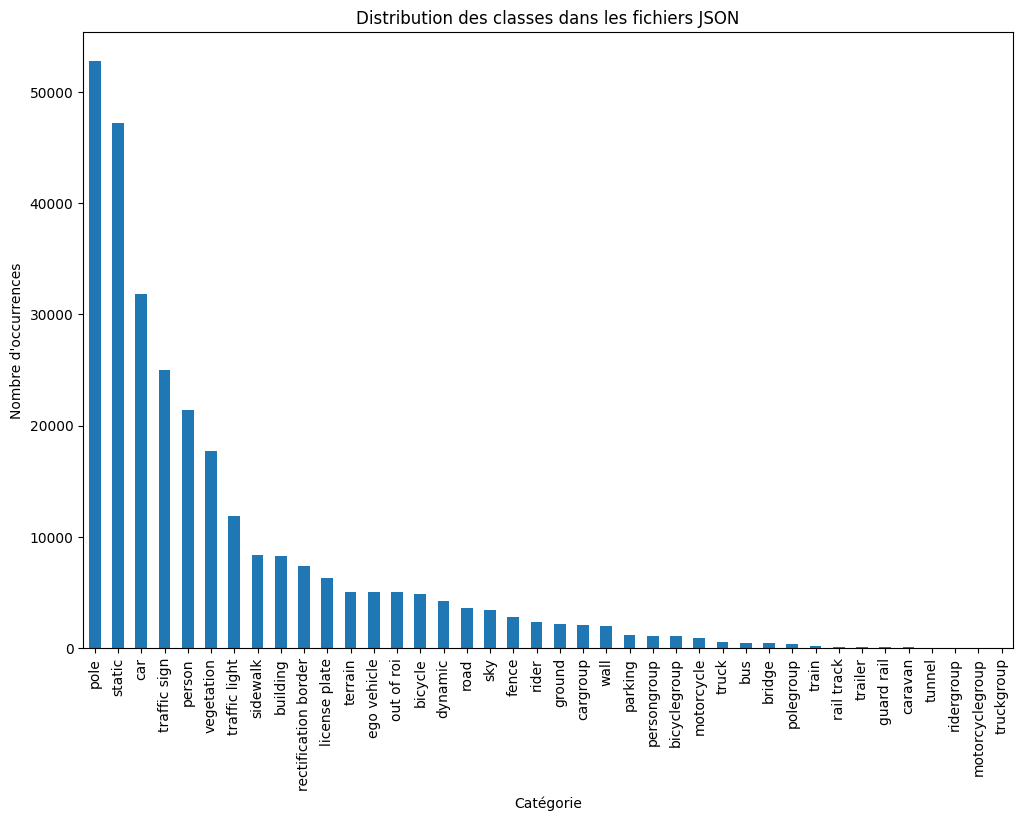

Distribution des classes en pourcentage :
label
pole                    18.349364
static                  16.425304
car                     11.069869
traffic sign             8.688362
person                   7.448907
vegetation               6.172925
traffic light            4.138939
sidewalk                 2.904354
building                 2.887656
rectification border     2.565878
license plate            2.187745
terrain                  1.763693
ego vehicle              1.739342
out of roi               1.739342
bicycle                  1.705947
dynamic                  1.479484
road                     1.257892
sky                      1.190058
fence                    0.987598
rider                    0.822013
ground                   0.748265
cargroup                 0.714870
wall                     0.688432
parking                  0.423008
persongroup              0.371871
bicyclegroup             0.364914
motorcycle               0.308907
truck                    0.202459


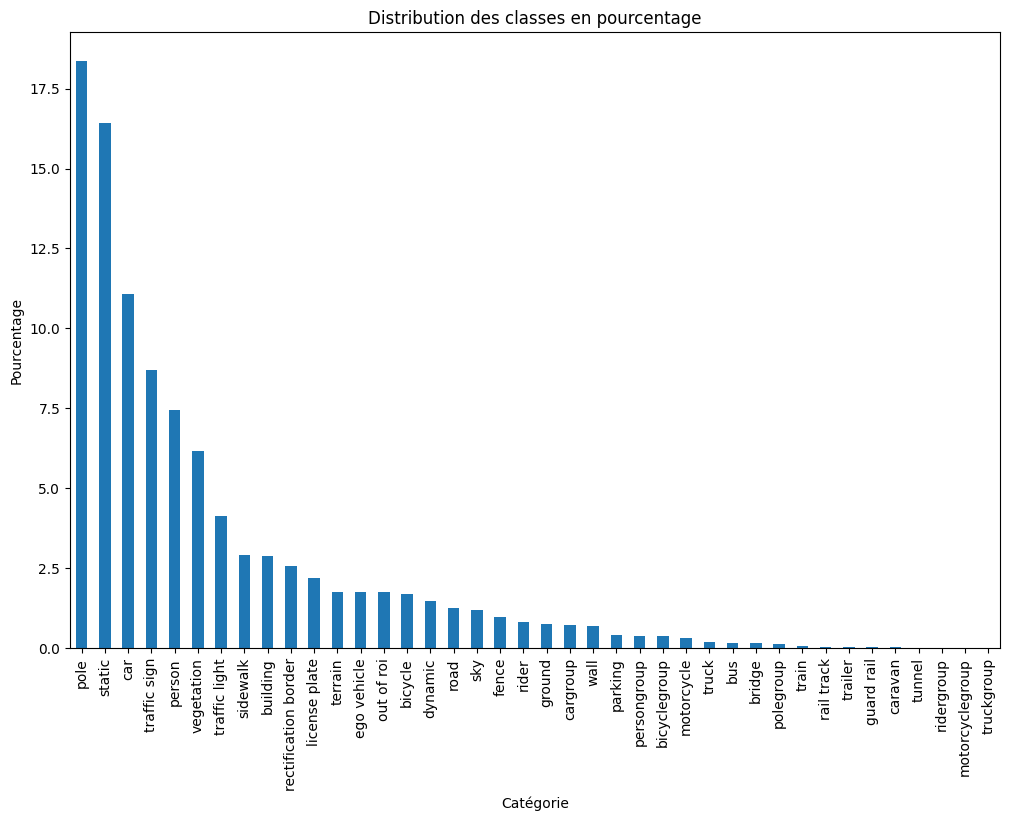

In [4]:
# Analyse de la distribution des classes
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution des classes dans les fichiers JSON')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Vérifier l'équilibre des classes
total_instances = category_counts.sum()
class_distribution = (category_counts / total_instances) * 100
print("Distribution des classes en pourcentage :")
print(class_distribution)

# Visualiser la distribution des classes en pourcentage
plt.figure(figsize=(12, 8))
class_distribution.plot(kind='bar')
plt.title('Distribution des classes en pourcentage')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage')
plt.show()